In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from pathlib import Path
from datetime import datetime as dt
import time, os
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier


In [2]:
## function to genearte Confusion Matrix and Classification Report
def gen_cm_cr(modelName, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(
        cm, index=["Legitimate 0", "Fraudulent 1"], columns=["Predicted Legitimate 0", "Predicted Fraudulent 1"]
    )
    # Calculating the accuracy score
    acc_score = accuracy_score(y_test, y_pred)
    bal_acc_score = balanced_accuracy_score(y_test, y_pred)
    print("Confusion Matrix: " + modelName)
    display(cm_df)
    print(f"Accuracy Score : {acc_score}")
    print(f"Balanced Accuracy Score: {bal_acc_score}")
    print("Classification Report")
    print(classification_report(y_test, y_pred))

In [3]:
## function to find the distance in kilometers between two geo-spatial co-ordinates.  Based on excample from Scikit Learn documentation
def get_distance(from_lat, from_lng, to_lat, to_lng):
    from sklearn.metrics.pairwise import haversine_distances
    from math import radians
    start =[]
    end =[]
    start.append(from_lat)
    start.append(to_lat)
    end.append(to_lat)
    end.append(to_lng)
    start_in_radians = [radians(_) for _ in start]
    end_in_radians = [radians(_) for _ in end]
    result = haversine_distances([start_in_radians, end_in_radians])
    result * 6371000/1000 
    return result

In [4]:
## function to assign the U.S. Bureau of Economic Analysis region to a state.
def get_region(state):
    
    states_to_bea_regions = {
        "AL": "Southeast",
        "AK": "Far West",
        "AZ": "Southwest",
        "AR": "Southeast",
        "CA": "Far West",
        "CO": "Rocky Mountain",
        "CT": "New England",
        "DE": "Mideast",
        "DC": "Mideast",
        "FL": "Southeast",
        "GA": "Southeast",
        "HI": "Far West",
        "ID": "Rocky Mountain",
        "IL": "Great Lakes",
        "IN": "Great Lakes",
        "IA": "Plains",
        "KS": "Plains",
        "KY": "Southeast",
        "LA": "Southeast",
        "ME": "New England",
        "MD": "Mideast",
        "MA": "New England",
        "MI": "Great Lakes",
        "MN": "Great Lakes",
        "MS": "Southeast",
        "MO": "Great Lakes",
        "MT": "Rocky Mountain",
        "NE": "Plains",
        "NV": "Southwest",
        "NH": "New England",
        "NJ": "Mideast",
        "NM": "Southwest",
        "NY": "Mideast",
        "NC": "Southeast",
        "ND": "Plains",
        "OH": "Great Lakes",
        "OK": "Southwest",
        "OR": "Far West",
        "PA": "Mideast",
        "RI": "New England",
        "SC": "Southeast",
        "SD": "Plains",
        "TN": "Southeast",
        "TX": "Southwest",
        "UT": "Rocky Mountain",
        "VT": "New England",
        "VA": "Mideast",
        "WA": "Far West",
        "WV": "Southeast",
        "WI": "Great Lakes",
        "WY": "Rocky Mountain"
    }
    region = states_to_bea_regions.get(state)
    return region

This dataset offers a variety of attributes valuable for comprehensive analysis. It contains 555,719 instances and 22 attributes, a mix of categorical and numerical data types. Importantly, the dataset is complete with no null values. Here's a breakdown of the attributes:  

1.t
Trans_date_trans_time: Timestamp of the transacti.  
2. cc
C  u m:Unique customer identificationum  r.  
3. merchant: antThe merchant involved in the transi     
4. c.
t::eg: ory Transaction type (e.g., perso, childcare).  .5.
a Amnt: Transaction amo.  
6. f.
First: Cardho first name.  
7. le.
: 
Last Cader dhst name.  
8. gme.
Gendrdholder gender.  
9. sder.
Street: Cer sardht address.  
10. cres: lCardholder city.  err  sdence.
State:er stater  
12. zip: Cardholder zip code   
13. lat: Latitude of cardholder.  
14. long: Longitude of cardholder.  
15. coca  tio Population of cardholder city.  
16. j.
r'job title of card holder.  
17. dob: Cardholder  
18.
18. 's d  
18. trans_num: unique transaction identifier.  
19. unix_time: transaction timestamp in unix format.  
20. merch_lat: latitude of merchant location.  
21. merch_long: longitude of merchant location.  
22.    (longi tude).
IsfraunsacFraudulent* tra stionndicator (1 = f**raud, **0 = legitie mate). This is thtargvariable for c***lassif**  ication purposes.

In [5]:
#importing dataset
fraud_test_df = pd.read_csv('Resources/fraud test.csv')

In [6]:
fraud_test_df.describe(include='all')

,ID,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,date_dob,dt_trans_date_time,age_years,distance_km,region
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719,5.557190e+05,555719.000000,555719.000000,555719.000000,555719,555719,555719.000000,555719.000000,555719
unique,NaN,226976,NaN,693,14,NaN,341,471,2,924,...,555719,NaN,NaN,NaN,NaN,910,226976,NaN,NaN,8
top,NaN,15/12/2020 21:26,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN,1977-03-23,2020-12-15 21:26:00,NaN,NaN,Southeast
freq,NaN,16,NaN,1859,56370,NaN,11443,12146,304886,1474,...,1,NaN,NaN,NaN,NaN,2408,16,NaN,NaN,134330
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,NaN,1.380679e+09,38.542798,-90.231380,0.003860,NaN,NaN,50.482859,1.544140,NaN
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,NaN,5.201104e+06,5.095829,13.733071,0.062008,NaN,NaN,17.442666,0.144049,NaN
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,1.371817e+09,19.027422,-166.671575,0.000000,NaN,NaN,19.246387,0.768004,NaN
25%,138929.500000,NaN,1.800430e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,NaN,1.376029e+09,34.755302,-96.905129,0.000000,NaN,NaN,37.029948,1.436157,NaN
50%,277859.000000,NaN,3.521420e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,NaN,1.380762e+09,39.376593,-87.445204,0.000000,NaN,NaN,48.432688,1.530904,NaN
75%,416788.500000,NaN,4.635330e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,NaN,1.385867e+09,41.954163,-80.264637,0.000000,NaN,NaN,61.616250,1.631600,NaN


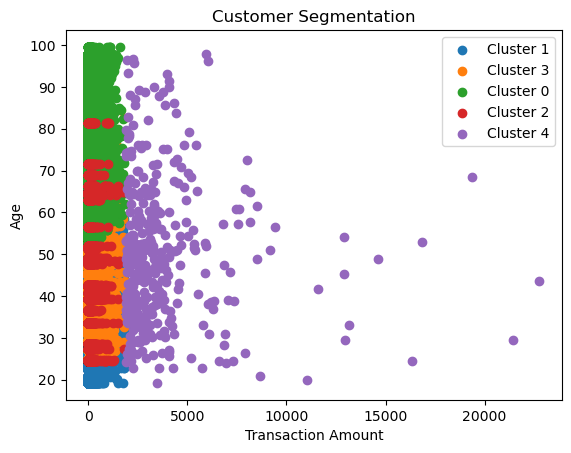

In [76]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting the optimal number of clusters and perform K-means clustering
k = 5  
kmeans = KMeans(n_clusters=k, random_state=1)
clusters = kmeans.fit_predict(fraud_test_df_scaled)

# Adding cluster labels 
fraud_test_df['cluster'] = clusters

# Visualize the clusters 
for cluster in fraud_test_df['cluster'].unique():
    cluster_data = fraud_test_df[fraud_test_df['cluster'] == cluster]
    plt.scatter(cluster_data['amt'], cluster_data['age_years'], label=f'Cluster {cluster}')

plt.xlabel('Transaction Amount')
plt.ylabel('Age')
plt.title('Customer Segmentation')
plt.legend()
plt.show()

Each cluster represents a group of customers who exhibit similar transaction behavior and age characteristics. By clustering customers based on transaction amount and age, we can identify distinct segments within the customer base.
The analysis aims to uncover patterns or similarities among customers that may not be immediately apparent when examining the data as a whole. Each cluster may represent a different customer segment with unique attributes or preferences.
For example, one cluster might consist of younger customers who make small to moderate-sized transactions, while another cluster might represent older customers who make larger transactions. The interpretation of each cluster's characteristics depends on the specific context of the dataset and the insights derived from the analysis.

# Preprocessing and Feature Engineering

In [8]:
# moving the Unnamed column to the index and renaming it 'ID'
fraud_test_df.rename(columns={'Unnamed: 0':'ID'}, inplace=True)
fraud_test_df.set_index('ID', inplace=True, drop=True, verify_integrity ='True')

In [9]:
#creating cardholder age feature
fraud_test_df['date_dob'] = pd.to_datetime(fraud_test_df['dob'], format='%d/%m/%Y')
fraud_test_df['dt_trans_date_time'] = pd.to_datetime(fraud_test_df['trans_date_trans_time'], format='%d/%m/%Y %H:%M')
fraud_test_df['age_years'] = (dt.today()- fraud_test_df['date_dob'])/pd.Timedelta('365 days')

In [10]:
#creating distance between cardholder and merchant feature and economic region feature from the state abbreviation.
for index, row in fraud_test_df.iterrows():
    fraud_test_df.at[index, 'distance_km'] = get_distance(row['lat'], row['long'], row['merch_lat'], row['merch_long'])[0][1]
    fraud_test_df.at[index, 'region'] = get_region(row['state'])

In [11]:
# collapsing job categories to 'other' category for any category with fewer than 225 entries
job_counts=fraud_test_df['job'].value_counts()
job_counts_df = job_counts.to_frame(name='counts')
for index, row in job_counts_df.iterrows():
    if job_counts_df.at[index, 'counts'] < 225:
        fraud_test_df.loc[fraud_test_df['job'] == index, ['job']] = 'other'
        

In [12]:
fraud_test_df['job'].value_counts()

job
other                                                          12796
Film/video editor                                               4119
Exhibition designer                                             3968
Surveyor, land/geomatics                                        3756
Naval architect                                                 3750
                                                               ...  
Scientist, clinical (histocompatibility and immunogenetics)      413
Sports administrator                                             412
Ambulance person                                                 407
Plant breeder/geneticist                                         406
Media planner                                                    402
Name: count, Length: 418, dtype: int64

In [13]:
fraud_test_df['merchant'].value_counts()

merchant
fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: count, Length: 693, dtype: int64

## Feature Encoding
1. get_dummies/one_hot_encoders: Category, Gender, region
3. Target_encoder:  city, state, jobs, merchant, cc_num  

In [14]:
# Select features (X) and target variable (y)
y = fraud_test_df['is_fraud']
X = fraud_test_df.copy()

In [15]:
dummies= pd.get_dummies(X[['category','gender', 'region']])

In [16]:
dummy_columns = dummies.columns.tolist()
X[dummy_columns] = dummies[dummy_columns]

In [17]:
X.drop(['is_fraud', 'amt', 'category', 'cc_num', 'state', 'city', 'city_pop', 'date_dob', 'gender', 'first', 'last', 'street', 'dob', 'trans_date_trans_time', 'dt_trans_date_time', 'lat', 'long', 'merch_lat', 'merch_long', 'trans_num', 'unix_time', 'region'], axis=1, inplace=True)
X.head()

,merchant,zip,job,age_years,distance_km,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,...,gender_F,gender_M,region_Far West,region_Great Lakes,region_Mideast,region_New England,region_Plains,region_Rocky Mountain,region_Southeast,region_Southwest
ID,,,,,,,,,,,,,,,,,,,,,
0,fraud_Kirlin and Sons,29209,Mechanical engineer,56.138887,1.551148,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,fraud_Sporer-Keebler,84002,"Sales professional, IT",34.292311,1.666594,False,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
2,"fraud_Swaniawski, Nitzsche and Welch",11710,"Librarian, public",53.547106,1.387472,False,False,False,False,False,...,True,False,False,False,True,False,False,False,False,False
3,fraud_Haley Group,32780,Set designer,36.777243,1.599663,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
4,fraud_Johnston-Casper,49632,Furniture designer,68.851216,1.408470,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False


# Splitting Training and Testing data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
# creating Target Encoder with only the training features and training targets
myEncoder = TargetEncoder(random_state = 1)
X_train_encoded = myEncoder.fit_transform(X_train[['merchant', 'job' ]], y_train)
X_test_encoded = myEncoder.transform(X_test[['merchant', 'job' ]])

In [20]:
#checking the distribution of the labels by set to ensure reasonable distribution.
print(f'Average class probability in data set:    {y.mean()*100:.4f}%')
print(f'Average class probability in training set: {y_train.mean()*100:.4f}%') 
print(f'Average class probability in test set:     {y_test.mean()*100:.4f}%')

Average class probability in data set:    0.3860%
Average class probability in training set: 0.3839%
Average class probability in test set:     0.3923%


In [21]:
X_train_enc_df=X_train.copy()
X_test_enc_df=X_test.copy()
X_train_enc_df[['merchant', 'job' ]]=X_train_encoded
X_test_enc_df[['merchant',  'job' ]]=X_test_encoded

In [22]:
y_test.value_counts()

is_fraud
0    138385
1       545
Name: count, dtype: int64

In [23]:
# putting feature column names into a list for later use
X_train_col = X_train_enc_df.columns.tolist()

# Scale the training and testing features

In [24]:
scaler=StandardScaler()

In [25]:
X_train_enc_scaled=scaler.fit_transform(X_train_enc_df)
X_test_enc_scaled = scaler.transform(X_test_enc_df)

In [26]:
X_train_enc_scaled_df = pd.DataFrame(X_train_enc_scaled, columns=X_train_col)
X_test_enc_scaled_df = pd.DataFrame(X_test_enc_scaled, columns=X_train_col)

In [27]:
X_train_enc_scaled_df.head()

,merchant,zip,job,age_years,distance_km,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,...,gender_F,gender_M,region_Far West,region_Great Lakes,region_Mideast,region_New England,region_Plains,region_Rocky Mountain,region_Southeast,region_Southwest
0,-0.488834,-0.455081,-0.704011,0.106165,0.874965,-0.279109,-0.275894,-0.336369,-0.190103,-0.323049,...,0.906592,-0.906592,-0.286015,-0.50634,-0.485696,-0.212546,-0.291583,-0.224044,1.771235,-0.366405
1,1.558711,-0.927303,-0.194367,-0.677851,-0.387253,-0.279109,-0.275894,-0.336369,-0.190103,3.095507,...,0.906592,-0.906592,-0.286015,-0.50634,2.058900,-0.212546,-0.291583,-0.224044,-0.564578,-0.366405
2,-0.542070,1.839776,-0.704011,-0.620335,-0.650066,-0.279109,-0.275894,2.972925,-0.190103,-0.323049,...,0.906592,-0.906592,3.496321,-0.50634,-0.485696,-0.212546,-0.291583,-0.224044,-0.564578,-0.366405
3,1.262465,-1.629416,-0.174064,-0.916246,-1.505442,-0.279109,-0.275894,-0.336369,-0.190103,-0.323049,...,-1.103032,1.103032,-0.286015,-0.50634,-0.485696,4.704855,-0.291583,-0.224044,-0.564578,-0.366405
4,-0.854724,-1.668036,0.213382,1.015586,-1.717953,-0.279109,-0.275894,-0.336369,-0.190103,-0.323049,...,-1.103032,1.103032,-0.286015,-0.50634,-0.485696,4.704855,-0.291583,-0.224044,-0.564578,-0.366405


# Create a KNN Model with the training data

In [28]:
# Initialize and train the KNN model with k = 5 neighbours
knNmodel = KNeighborsClassifier(n_neighbors=5)

In [29]:
# Train & fit the model
start_time = time.time()
knNmodel.fit(X_train_enc_scaled, y_train)
# print("--- %s seconds ---" % (time.time() - start_time))

KNeighborsClassifier()

In [30]:
# Make predictions on test data
y_pred = knNmodel.predict(X_test_enc_scaled)

In [35]:
# Calculate accuray score, balanced accuracy score & classification report
gen_cm_cr('KNNModelclassifier', y_test, y_pred)

Confusion Matrix: KNNModelclassifier


,Predicted Legitimate 0,Predicted Fraudulent 1
Legitimate 0,138377,8
Fraudulent 1,542,3


Accuracy Score : 0.9960411718131433
Balanced Accuracy Score: 0.5027233887111247
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138385
           1       0.27      0.01      0.01       545

    accuracy                           1.00    138930
   macro avg       0.63      0.50      0.50    138930
weighted avg       0.99      1.00      0.99    138930



In our evaluation of the KNN model for predicting fraudulent transactions, we achieved an impressive overall accuracy of 99.60%, indicating its proficiency in classifying transactions accurately. However, the dataset's imbalance is evident in the balanced accuracy score of 50.27%, revealing limitations in its performance. While the model excels in identifying legitimate transactions, it struggles with fraudulent ones, as indicated by the low recall of 1%. This leads to numerous false negatives, missing instances of fraud. Additionally, the precision of 27% highlights a high rate of false positives, where legitimate transactions are misclassified. These findings underscore the importance of refining or exploring alternative models to enhance fraud detection capabilities. Although the KNN model demonstrates strong accuracy overall, addressing its limitations in correctly identifying fraudulent transactions is paramount for effective fraud prevention strategies.

# Creating Random Forest Model with training data

In [42]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=750, random_state=1)

In [46]:
# Fitting the model
start_time = time.time()
rf_model = rf_model.fit(X_train_enc_scaled, y_train)
# print("--- %s seconds ---" % (time.time() - start_time))

In [47]:
# Making predictions using the testing data
y_pred = rf_model.predict(X_test_enc_scaled)

In [48]:
# Calculate accuray score, balanced accuracy score & classification report
gen_cm_cr('RandomForestClasssifer', y_test, y_pred)

Confusion Matrix: RandomForestClasssifer


,Predicted Legitimate 0,Predicted Fraudulent 1
Legitimate 0,138376,9
Fraudulent 1,527,18


Accuracy Score : 0.9961419419851724
Balanced Accuracy Score: 0.5164812434926758
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    138385
           1       0.67      0.03      0.06       545

    accuracy                           1.00    138930
   macro avg       0.83      0.52      0.53    138930
weighted avg       0.99      1.00      0.99    138930



With an accuracy score of 99.61% and a balanced accuracy score of 51.65%, our model showcases robust performance in accurately predicting both legitimate and fraudulent transactions. While achieving a precision of 67% and recall of 3% for fraudulent transactions, there is room for improvement in identifying fraudulent cases. Overall, our model demonstrates strong potential for fraud detection, with further optimization opportunities to enhance its effectiveness.